<a href="https://colab.research.google.com/github/AftabUdaipurwala/Deeplearning/blob/main/Stochastic_Gradient_Descent_vs_Batch_Gradient_Descent_vs_Mini_Batch_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy
import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras



In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls '/content/drive/MyDrive/py-master/DeepLearningML/8_sgd_vs_gd/'

gd_and_sgd.ipynb	 homeprices.csv
gradient_descent.ipynb	 hp.jpg
gradient_descent.py	 mini_batch_gd_exercise_solution.ipynb
homeprices_banglore.csv  mini_batch_gd.ipynb


In [6]:
df = pd.read_csv('/content/drive/MyDrive/py-master/DeepLearningML/8_sgd_vs_gd/homeprices.csv')
df.head()

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3600,3,30,595000
4,4000,5,8,760000


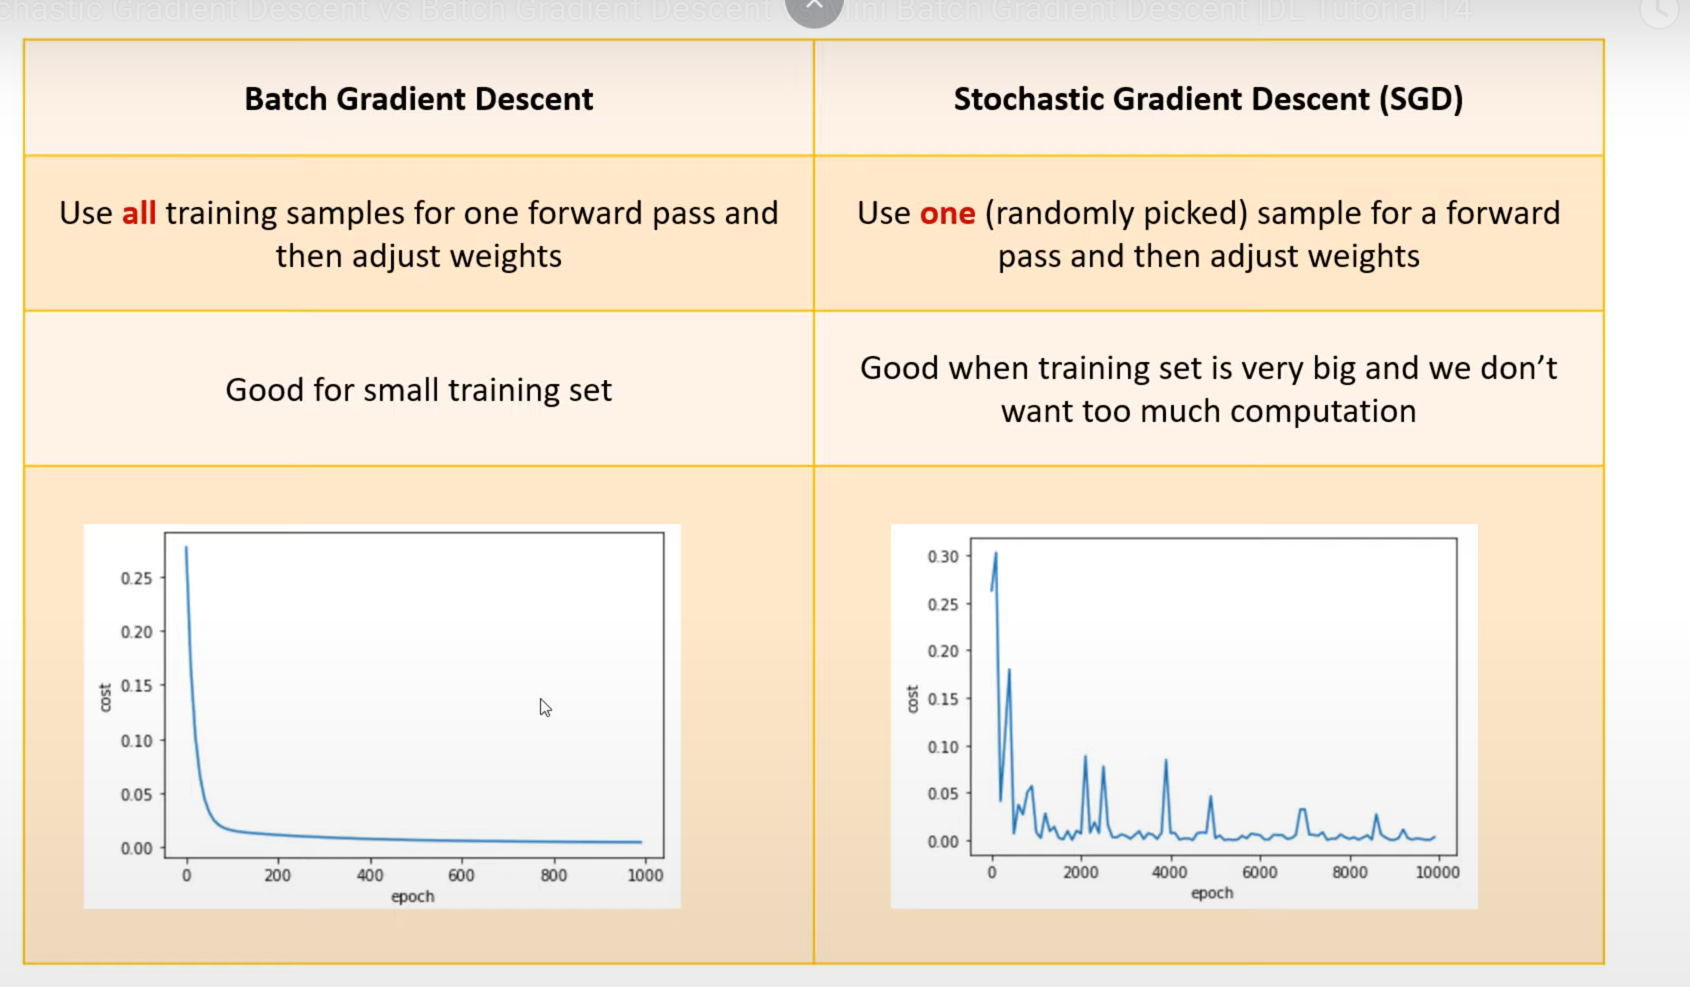

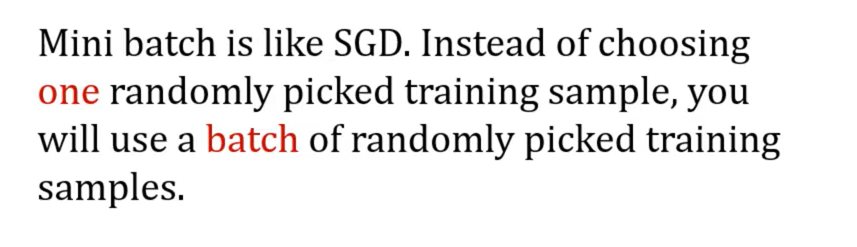